In [1]:
# Importing packages
import numpy as np

# The interp1d function is the equivalent of interp1 in Matlab
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
# The magic command below causes the resulting plots to be stored in the notebook document
# Only works in IPython Notebooks and not in regular Python files
%matplotlib inline

# needed for compact printing of numpy arrays
# use precision to set the number of decimal digits to display
# use suppress=True to show values in full decimals instead of using scientific notation
np.set_printoptions(suppress=True,precision=4,linewidth=np.inf)

In [2]:
# Declarations
beta = 0.99
sigma = 1
delta = 0.025
theta = 0.36
plots = 1
simu = 1
loadin = 0

In [3]:
# Grid dimensions
ns = 2
N = 301
T = ns*N

In [4]:
# Shock
zz = np.array([[0.9900], [1.0100]])
ug = 8
p = 1-1/ug
pi = np.array([[p,1-p],[1-p,p]])

In [5]:
# Grid on capital
k = np.zeros((N,1))
k[0] = 1
k[N-1] = 120
for i in np.arange(1,N-1):
    k[i]=k[0]+i*(k[N-1]-k[0])/(N-1)


In [6]:
# Initialization of policies
r = np.zeros((N,ns))
w = np.zeros((N,ns))
c = np.zeros((N,ns))
kpr = np.zeros((N,ns))

if loadin==0:
    # Initial Policy Functions
    for m in np.arange(0,ns):
        for i in np.arange(0,N):
            r[i,m]=theta*zz[m]*k[i]**(theta-1)+1-delta
            w[i,m]=(1-theta)*zz[m]*k[i]**(theta)
            c[i,m]=max(0.001,(zz[m]*k[i]**(theta)-delta*k[i]))
            kpr[i,m]=max(k[0],w[i,m]+r[i,m]*k[i]-c[i,m])
            kpr[i,m]=min(kpr[i,m],k[N-1])

else:
    with open('polgrowth.npy', 'rb') as f:
        polgrowth = np.load(f)
    A = polgrowth.copy()
    
    for i in np.arange(0,ns):
        for l in np.arange(0,N):
            c[l,i]=A[l+i*N,1]
            kpr[l,i]=A[l+i*N,2]


cpp = np.zeros((ns,ns))
cn = np.zeros((N,ns))
kprn = np.zeros((N,ns))

niter = 0
err = np.array([10.,10.])
interma = 0
while np.amax(err)>0.000001:
    if niter>1000:
        break
    
    niter=niter+1
    for m in np.arange(0,ns):
        for i in np.arange(0,N):
            if interma==1:
                cpp=(interp1d(k.squeeze(),c,axis=0)(kpr[i,m]))**(-sigma)
            else:
                mm = np.abs(kpr[i,m]-k).argmin()
                
                if (kpr[i,m]<=k[mm] and mm>1):
                    weight=(k[mm]-kpr[i,m])/(k[mm]-k[mm-1])
                    cpp=((weight*c[mm-1,:]+(1-weight)*c[mm,:])**(-sigma)).T
                else:
                    weight=(k[mm+1]-kpr[i,m])/(k[mm+1]-k[mm])
                    cpp=((weight*c[mm,:]+(1-weight)*c[mm+1,:])**(-sigma)).T
                    

            cn[i,m]=max(0.001,(beta*np.sum(cpp*(theta*zz.squeeze()*kpr[i,m]**(theta-1)+1-delta)*(pi[m,:].T)))**(-1/sigma))

            r[i,m]=theta*zz[m]*k[i]**(theta-1)+1-delta
            w[i,m]=(1-theta)*zz[m]*k[i]**theta
            kprn[i,m]=max(k[0],w[i,m]+r[i,m]*k[i]-cn[i,m])
            kprn[i,m]=min(kprn[i,m],k[N-1])

    err[0]=np.abs((c-cn)).max()
    err[1]=np.abs((kpr-kprn)).max()

    print("iteration =", niter, ", Error = ", err[0], err[1])
    c=cn.copy()
    kpr=kprn.copy()
    
polgrowth=np.zeros((N*ns,5))
for m in np.arange(0,ns):
    for i in np.arange(0,N):
        polgrowth[i+m*N,0]=k[i]
        polgrowth[i+m*N,1]=c[i,m]
        polgrowth[i+m*N,2]=kpr[i,m]
        polgrowth[i+m*N,3]=r[i,m]
        polgrowth[i+m*N,4]=w[i,m]


with open('polgrowth.npy', 'wb') as f:
    np.save(f, polgrowth)


iteration = 1 , Error =  0.24313662041736495 0.24313662041736483
iteration = 2 , Error =  0.12465605621859632 0.12465605621859632
iteration = 3 , Error =  0.08900961160141074 0.0890096116014103
iteration = 4 , Error =  0.06958997063207462 0.06958997063207395
iteration = 5 , Error =  0.057976576935828916 0.057976576935828916
iteration = 6 , Error =  0.05824408952249405 0.05824408952250337
iteration = 7 , Error =  0.05876420574169039 0.05876420574168151
iteration = 8 , Error =  0.05947994149691205 0.05947994149691738
iteration = 9 , Error =  0.060343704735277726 0.06034370473527417
iteration = 10 , Error =  0.06132030812476241 0.0613203081247633
iteration = 11 , Error =  0.062377976197156126 0.062377976197154794
iteration = 12 , Error =  0.06348960836501183 0.0634896083650176
iteration = 13 , Error =  0.06463181318571021 0.06463181318571287
iteration = 14 , Error =  0.06578362210043265 0.06578362210042599
iteration = 15 , Error =  0.06692097391367735 0.06692097391368179
iteration = 16 , 

iteration = 122 , Error =  4.767979466624439e-05 4.76797946618035e-05
iteration = 123 , Error =  4.379504975915438e-05 4.3795049762707094e-05
iteration = 124 , Error =  4.022888494059629e-05 4.0228884941484466e-05
iteration = 125 , Error =  3.6955080108924676e-05 3.695508010537196e-05
iteration = 126 , Error =  3.394944373180664e-05 3.394944373269482e-05
iteration = 127 , Error =  3.11898489036011e-05 3.118984891159471e-05
iteration = 128 , Error =  2.8656023109085993e-05 2.86560231046451e-05
iteration = 129 , Error =  2.6329367214472654e-05 2.632936721624901e-05
iteration = 130 , Error =  2.4192829044089592e-05 2.419282904497777e-05
iteration = 131 , Error =  2.223077139351659e-05 2.2230771392628412e-05
iteration = 132 , Error =  2.04288528067309e-05 2.04288528067309e-05
iteration = 133 , Error =  1.877391953364338e-05 1.8773919535419736e-05
iteration = 134 , Error =  1.725390623086298e-05 1.7253906221981197e-05
iteration = 135 , Error =  1.585774505485915e-05 1.585774505485915e-05
it

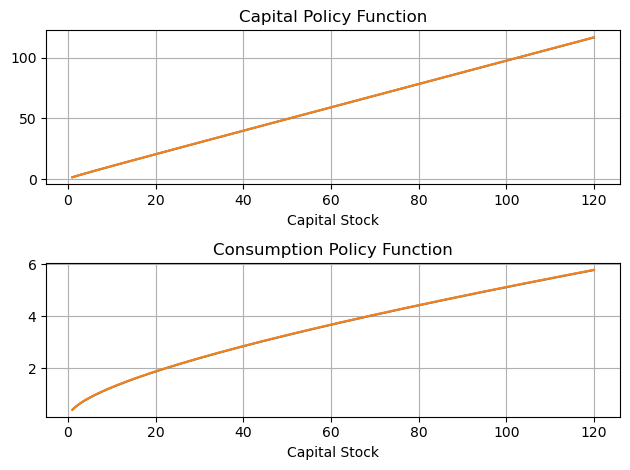

In [7]:
if plots:
    ccm = np.zeros((N,ns))
    kprcm = np.zeros((N,ns))
    
    PC = polgrowth.copy()
    KC = PC[0:N,0]
    
    for i in np.arange(0,ns):
        for l in np.arange(0,N):
            ccm[l,i]=PC[l+i*N,1]
            kprcm[l,i]=PC[l+i*N,2]

            
    # Plot capital and consumption policy functions
    fig1, axs1 = plt.subplots(2, 1)

    axs1[0].plot(KC, kprcm)
    axs1[0].set(xlabel='Capital Stock', title='Capital Policy Function')
    axs1[0].grid()



    axs1[1].plot(KC, ccm)
    axs1[1].set(xlabel='Capital Stock', title='Consumption Policy Function')
    axs1[1].grid()


    plt.tight_layout()
    plt.savefig('Growth_PI_policy.jpg', dpi=800)
    plt.show()
    plt.close(fig1)

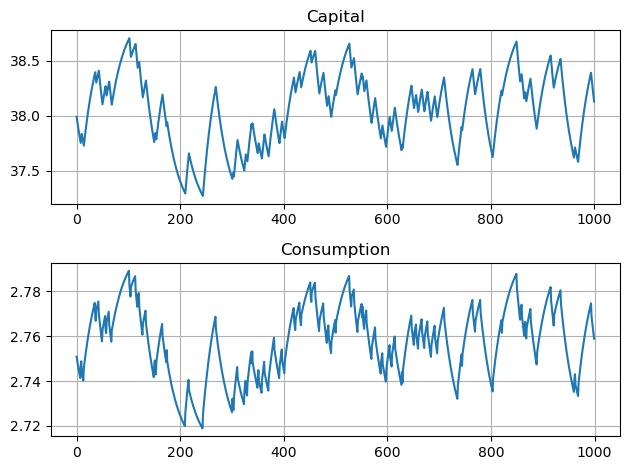

In [8]:
if simu:
    np.random.seed(1337)
    T = 1000
    zt = np.zeros((T,))
    st = np.zeros((T,),dtype=int)
    
    kt = np.zeros((T+1,))
    ct = np.zeros((T,))
    yt = np.zeros((T,))
    rt = np.zeros((T,))
    
    zt[0] = zz[0]
    st[0] = 0
        
    for i in np.arange(1,T):
        epsi = np.random.random()
        
        j = 0

        while pi[st[i-1],0:j+1].sum() < epsi:
            j = j + 1
        
        st[i] = j
        zt[i] = zz[j]
    
    
    kt[0]=((1/beta+delta-1)/theta)**(1/(theta-1))

    for i in np.arange(0,T):
        sz=0
        if (zt[i]>1):
            sz=1
        
        
        yt[i]=zt[i]*kt[i]**theta
        zzz=np.abs((k-kt[i])).argmin()
        mm=zzz.astype(int)-1
        if (kt[i]<k[mm]):
            mm=mm-1
        
        weight=(k[mm+1]-kt[i])/(k[mm+1]-k[mm])
        kt[i+1]=weight*kpr[mm,sz]+(1-weight)*kpr[mm+1,sz]
        ct[i]=(yt[i]+(1-delta)*kt[i]-kt[i+1])
        rt[i]=theta*zt[i]*kt[i]**(theta-1)-delta
    
    
    
    fig2, axs2 = plt.subplots(2, 1)

    axs2[0].plot(kt)
    axs2[0].set(title='Capital')
    axs2[0].grid()



    axs2[1].plot(ct)
    axs2[1].set(title='Consumption')
    axs2[1].grid()


    plt.tight_layout()
    plt.savefig('Growth_PI_simu.jpg', dpi=800)
    plt.show()
    plt.close(fig2)


In [9]:
#!jupyter nbconvert --to script growth_pi.ipynb